In [1]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-02'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.loc['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)

,AAPL,MSFT,SPY
2010-01-04,30.57,30.95,113.33
2010-01-05,30.63,30.96,113.63
2010-01-06,30.14,30.77,113.71
2010-01-07,30.08,30.45,114.19
2010-01-08,30.28,30.66,114.57
2010-01-11,30.02,30.27,114.73
2010-01-12,29.67,30.07,113.66
2010-01-13,30.09,30.35,114.62
2010-01-14,29.92,30.96,114.93
2010-01-15,29.42,30.86,113.64


In [2]:
#see what panel data actually is
>>> panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 1762 (major_axis) x 3 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AAPL to SPY

In [3]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
Close = panel_data.loc['Close']
    
Close.describe()
    

,AAPL,MSFT,SPY
count,1761.000000,1761.000000,1761.000000
mean,79.428597,37.134015,164.704651
std,28.317838,10.812267,37.067717
min,27.440000,23.010000,102.200000
25%,55.460000,27.840000,131.210000
50%,78.440000,33.030000,165.310000
75%,103.120000,46.110000,201.990000
max,133.000000,63.620000,227.760000


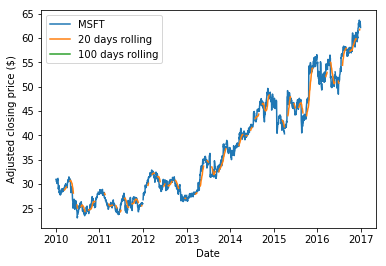

In [4]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

plt.show()

# PART 2

Intro to quantitative trading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#downloads a dataset that is already there
data = pd.read_pickle(r'C:\Users\carter\Downloads\data.pkl')
data.head(10)

    

,AAPL,MSFT,^GSPC
2000-01-03,3.625643,39.334630,1455.219971
2000-01-04,3.319964,38.005900,1399.420044
2000-01-05,3.368548,38.406628,1402.109985
2000-01-06,3.077039,37.120080,1403.449951
2000-01-07,3.222794,37.605172,1441.469971
2000-01-10,3.166112,37.879354,1457.599976
2000-01-11,3.004162,36.909170,1438.560059
2000-01-12,2.823993,35.706986,1432.250000
2000-01-13,3.133722,36.381897,1449.680054
2000-01-14,3.253159,37.879354,1465.150024


In [6]:
#calculating the short-window moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head()

,AAPL,MSFT,^GSPC
2000-01-03,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN


In [7]:
#calculating the short window moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,AAPL,MSFT,^GSPC
2016-12-26,110.958205,58.418182,2176.628791
2016-12-27,111.047874,58.476117,2177.500190
2016-12-28,111.140589,58.532936,2178.244490
2016-12-29,111.233698,58.586112,2178.879189
2016-12-30,111.315270,58.635267,2179.426990


In [9]:
#relative returns
returns = data.pct_change(1)
returns.head()

,AAPL,MSFT,^GSPC
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.084310,-0.033780,-0.038345
2000-01-05,0.014634,0.010544,0.001922
2000-01-06,-0.086538,-0.033498,0.000956
2000-01-07,0.047369,0.013068,0.027090


In [9]:
#log returns - first the logarithm of the prices is taken and then the difference of consecuritive (log) observations
log_returns = np.log(data).diff()
log_returns.head()

,AAPL,MSFT,^GSPC
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.088078,-0.034364,-0.039099
2000-01-05,0.014528,0.010489,0.001920
2000-01-06,-0.090514,-0.034072,0.000955
2000-01-07,0.046281,0.012984,0.026730


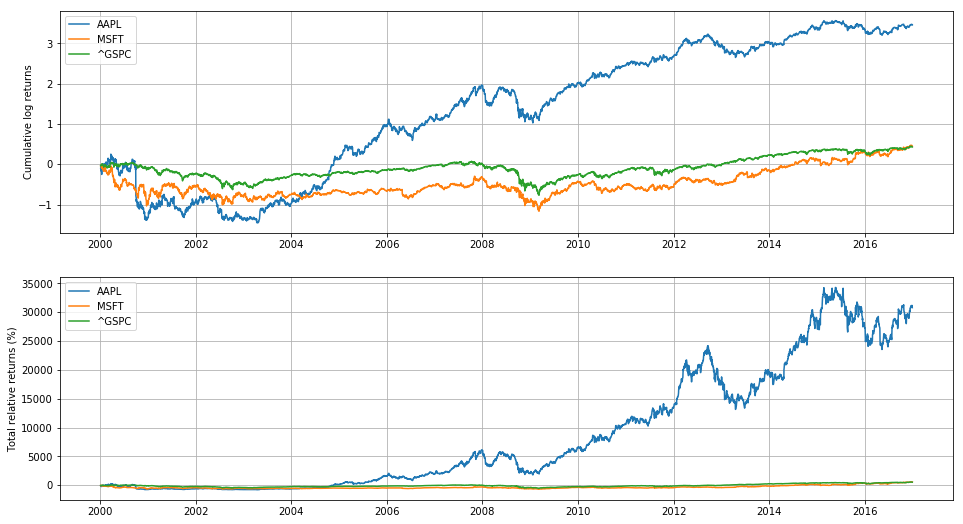

In [10]:
fig = plt.figure(figsize=[16,9])
ax = fig.add_subplot(2,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc ='best')
ax.grid()

ax = fig.add_subplot(2,1,2)

for c in log_returns:
    ax.plot(log_returns.index, 1000*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))
    
    
ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

plt.show()


# Quantitative Trading Example

In [12]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t


,2016-12-30 00:00:00
AAPL,-0.007826
MSFT,-0.012156
^GSPC,-0.004648


In [13]:
#weights as defined ->  rp(t)=w⃗ T(t)r⃗ (t)=w1(t)r1(t)+…+wK(t)rK(t)
#equal weight in each vector, aka apple msft and gspc
weights_vector = pd.DataFrame(1/3,index=r_t.index,columns=r_t.columns)
weights_vector



,2016-12-30 00:00:00
AAPL,0.333333
MSFT,0.333333
^GSPC,0.333333


In [14]:
#total log_return for portfolio is
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2016-12-30 00:00:00
2016-12-30,-0.00821


# using these vectors, trading strategy example


In [15]:
weights_matrix = pd.DataFrame(1 / 3, index=data.index, columns=data.columns)
weights_matrix.tail()

,AAPL,MSFT,^GSPC
2016-12-26,0.333333,0.333333,0.333333
2016-12-27,0.333333,0.333333,0.333333
2016-12-28,0.333333,0.333333,0.333333
2016-12-29,0.333333,0.333333,0.333333
2016-12-30,0.333333,0.333333,0.333333


In [17]:
log_returns.head()

,AAPL,MSFT,^GSPC
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.088078,-0.034364,-0.039099
2000-01-05,0.014528,0.010489,0.001920
2000-01-06,-0.090514,-0.034072,0.000955
2000-01-07,0.046281,0.012984,0.026730


In [16]:
#portfolio returns are calculated by
#initally the two matercies are multiplied. Note that we are only interested in the diagonal
#which is where the dates in the row-index and column-index math
#using iloc instead of ix
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
2000-01-03,NaN,-0.053847,0.008979,-0.04121,0.028665
2000-01-04,NaN,-0.053847,0.008979,-0.04121,0.028665
2000-01-05,NaN,-0.053847,0.008979,-0.04121,0.028665
2000-01-06,NaN,-0.053847,0.008979,-0.04121,0.028665
2000-01-07,NaN,-0.053847,0.008979,-0.04121,0.028665


In [18]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

#Note that these returns are only estimates because of our use of log-returns instead of relative returns. 
#However, for most practical purposes the difference is negligible. 




2016-12-26    0.000000
2016-12-27    0.003070
2016-12-28   -0.005753
2016-12-29   -0.000660
2016-12-30   -0.008210
Freq: B, dtype: float64

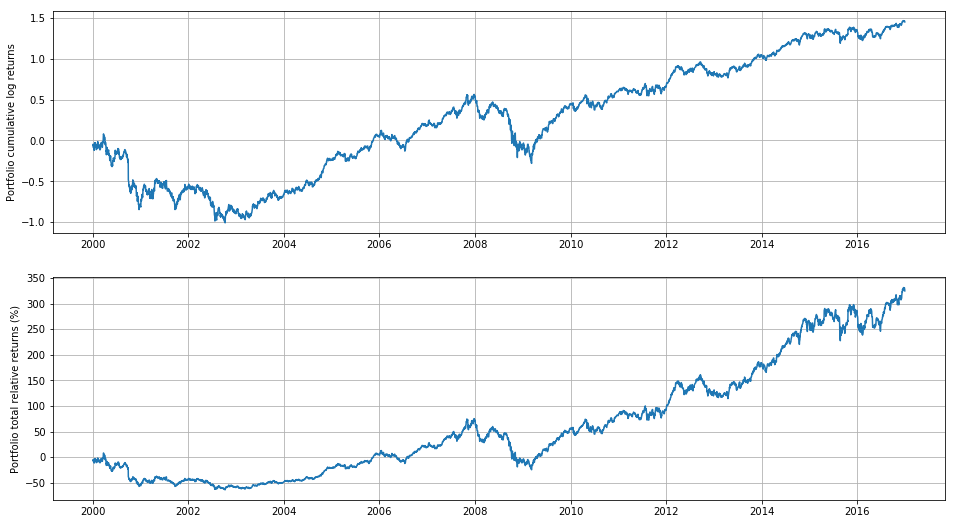

In [19]:
#Let us see what our cumulative log returns and the total relative returns for this portfolio look.
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig = plt.figure(figsize=[16,9])
ax = fig.add_subplot(2, 1, 1)
ax.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax.set_ylabel('Portfolio cumulative log returns')
ax.grid()
ax = fig.add_subplot(2, 1, 2)
ax.plot(total_relative_returns.index, 100 * total_relative_returns)
ax.set_ylabel('Portfolio total relative returns (%)')
ax.grid()
plt.show()

In [20]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' + '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print ('Average yearly return is: ' + '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 325.14%
Average yearly return is:  8.85%


# Moving Average Trading Strategy

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')

#downloads a dataset that is already there
data = pd.read_pickle(r'C:\Users\carter\Downloads\data.pkl')
data.head(10)


,AAPL,MSFT,^GSPC
2000-01-03,3.625643,39.334630,1455.219971
2000-01-04,3.319964,38.005900,1399.420044
2000-01-05,3.368548,38.406628,1402.109985
2000-01-06,3.077039,37.120080,1403.449951
2000-01-07,3.222794,37.605172,1441.469971
2000-01-10,3.166112,37.879354,1457.599976
2000-01-11,3.004162,36.909170,1438.560059
2000-01-12,2.823993,35.706986,1432.250000
2000-01-13,3.133722,36.381897,1449.680054
2000-01-14,3.253159,37.879354,1465.150024


In [77]:
#calculating simple moving average of the three time series -> first calculating the short-window SMA
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

,AAPL,MSFT,^GSPC
2000-01-03,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN
2000-01-12,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN
2000-01-14,NaN,NaN,NaN


In [22]:
#caculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,AAPL,MSFT,^GSPC
2016-12-26,110.958205,58.418182,2176.628791
2016-12-27,111.047874,58.476117,2177.500190
2016-12-28,111.140589,58.532936,2178.244490
2016-12-29,111.233698,58.586112,2178.879189
2016-12-30,111.315270,58.635267,2179.426990


In [1]:
#plotting two years for three time series to get a feeling of how they behave

start_date = '2013-01-01'
end_date = '2017-12-31'

fig = plt.figure(figsize=(15,9)) 
ax = fig.add_subplot(1,1,1)

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'MSFT'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

NameError: name 'plt' is not defined

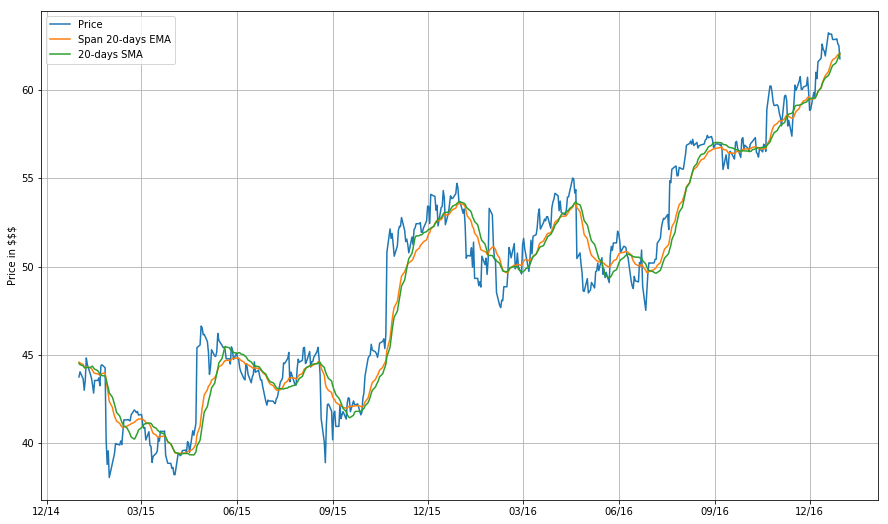

In [25]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = data.ewm(span =20, adjust = False).mean()

#adds area
fig = plt.figure(figsize=(15,9))
#adds plot axies
ax = fig.add_subplot(1,1,1)


ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

#adds legend

ax.legend(loc='best')
ax.set_ylabel('Price in $$$')
ax.grid()
ax.xaxis.set_major_formatter(my_year_month_fmt)

## Moving Average Trading Strategy

When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.

When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset.

Well for this strategy it is pretty straghtforward. All we need is to have a long position, i.e. wi(t)wi(t) >0, as long as the price timeseries is above the EMA timeseries and a short position, i.e. wi(t)wi(t) < 0, as long as the price timeseries is below the EMA timeseries.

Since, at this point, we are not interested yet in position sizing, we will assume that we use all our funds available to trade asset ii. We will also assume that our funds are split equally across all 33 assets (MSFT, AAPL and ^GSPC).

Based on these assumptions, our strategy for each of the assets i,i=1,…,3i,i=1,…,3 can be translated as follows:

Go long condition: If pi(t)>ei(t)pi(t)>ei(t), then wi(t)=13wi(t)=13
Go short condition: If pi(t)<ei(t)pi(t)<ei(t), then wi(t)=−13wi(t)=−13
Whenever, the trade conditions are satisfied, the weights are 1313 because 1313 of the total funds are assigned to each asset and whenever we are long or short, all of the available funds are invested.



In [31]:
# taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()



,AAPL,MSFT,^GSPC
2016-12-26,2.039488,1.040200,20.465712
2016-12-27,2.511890,0.977103,23.121693
2016-12-28,1.822235,0.623249,3.765377
2016-12-29,1.621664,0.482954,2.809706
2016-12-30,0.647437,-0.246519,-6.894490


In [33]:
#Taking the sign of the difference to determine whether the price or EMA is greater, and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,AAPL,MSFT,^GSPC
2016-12-26,0.333333,0.333333,0.333333
2016-12-27,0.333333,0.333333,0.333333
2016-12-28,0.333333,0.333333,0.333333
2016-12-29,0.333333,0.333333,0.333333
2016-12-30,0.333333,-0.333333,-0.333333


In [ ]:
#lagging our trading signals by a day (don't want to assume we have a long positon on day 0)
trading_positions_final = trading_positions.shift(1)

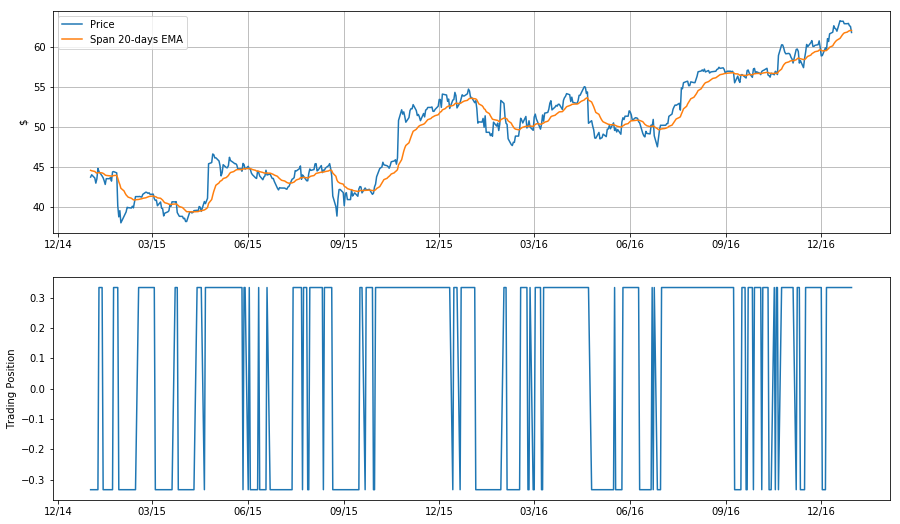

In [49]:
#Let us examine what the timeseries and the respective trading position look like for one of our assets, Microsoft.

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(2,1,1)

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')

ax.set_ylabel('$')
ax.legend(loc = 'best')
ax.grid()
ax.xaxis.set_major_formatter(my_year_month_fmt)


ax = fig.add_subplot(2,1,2)

ax.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, "MSFT"], label = 'Trading Position')

ax.set_ylabel('Trading Position')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [52]:
#assessing performance!
#log returns - first the logarithm of the prices is taken and the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns.head()


,AAPL,MSFT,^GSPC
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.088078,-0.034364,-0.039099
2000-01-05,0.014528,0.010489,0.001920
2000-01-06,-0.090514,-0.034072,0.000955
2000-01-07,0.046281,0.012984,0.026730


In [55]:
# To get all the strategy log-returns for all days, one needs simply to multiply the strategy positions with the asset log-returns.
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,AAPL,MSFT,^GSPC
2016-12-26,0.000000,0.000000,0.000000
2016-12-27,0.002110,0.000211,0.000749
2016-12-28,-0.001424,-0.001531,-0.002797
2016-12-29,-0.000086,-0.000477,-0.000098
2016-12-30,-0.002609,-0.004052,-0.001549
